In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdata
import matplotlib.pyplot as plt
import datetime, urllib3,json

%matplotlib inline 

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)





#symbol =sorted(['AA','AAL'])
#print(symbol)
#stockprice = pdata.get_data_yahoo(symbol, "2017-1-1", "2018-1-30")

#stockprice

In [5]:
XLF=['BAC','WFC','C','USB','GS','AXP',
'BRK.B','JPM',
'CME','MS',
'PNC',
'CB','SCHW','BLK',
'SPGI',
'BK',
'ICE',
'COF',
'MMC','MET','PGR',
'PRU',
'AIG',
'BBT',
'AON','TRV',
'AFL',
'ALL',
'STI',
'STT',
'MCO',
'DFS',
'TROW',
'MTB',
'NTRS',
'SYF',
'KEY',
'RF',
'WLTW',
'AMP',
'FITB',
'CFG',
'HIG',
'HBAN',
'CMA',
'AJG',
'LNC',
'L',
'ETFC',
'MSCI',
'SIVB',
'PFG',
'CBOE',
'CINF',
'RJF',
'NDAQ',
'BEN',
'ZION',
'IVZ',
'RE',
'TMK',
'UNM',
'AMG',
'JEF',
'PBCT',
'AIZ',
'BHF',]

In [6]:
def get_etf_constituents(etf_tickers):
    res={}
    
    http = urllib3.PoolManager()
    for etf in etf_tickers:
        stock_tickers=[]
        
        if etf=="XLF":
            stock_tickers = XLF
        
        else :
        
            r = http.request('GET', 'https://core-api.barchart.com/v1/EtfConstituents?'+
            'composite=%s&'%etf+
            'fields=symbol,symbolName,percent,sharesHeld,symbolCodes,symbolType,lastPrice,dailyLastPrice&'+
            'orderBy=percent&orderDir=desc&meta=field.shortName,field.type,field.description&page=1&'+
            'limit=100&'+
            'raw=1')
            print(json.loads(r.data.decode('utf-8')))
            datas = json.loads(r.data.decode('utf-8'))['data']



            for data in datas:
                if (data['symbol'] != 'Unassigned') and \
                    (data['symbol'] != '') and (data['symbol'] != etf):
                    stock_tickers.append(data['symbol'])
                
                
      
        res[etf]=stock_tickers
    #print(res)
    return res

etfs=['XLF','XLE','XLI','XLB','XLP','XLY','XTL','XLK','XLV','XLU','XLRE']

In [7]:
import datetime
symbol_fin = sorted([
                "AMG","AFL","ALL","AXP","AIG","AMP","AON","AJG","AIZ",
                 "BAC","BK","BBT","BRK.B","BLK","HRB","BHF",
                 "COF","CBOE","SCHW","CB","CINF","C","CFG","CME","CMA",
                 "DFS","ETFC","RE","FITB","BEN","GS","HIG","HBAN",
                 "ICE","IVZ","JPM","KEY",
                 "LUK","LNC","L","MTB","MMC","MET","MCO","MS",
                 "NDAQ","NAVI","NTRS","PBCT","PNC","PFG","PGR","PRU",
                 "RJF","RF","SPGI","STT","STI","SYF","TROW","TMK","TRV",
                 "USB","UNM","WFC","WLTW","XL","ZION"])

symbol_tech = sorted(['AAPL','MSFT','FB','GOOG','GOOGL','INTC','V',
                'T','CSCO','VZ','MA','NVDA','ORCL','IBM','ADBE',
                'TXN','AVGO','ACN','PYPL','QCOM','CRM','MU','AMAT',
                'ATVI','ADP','CTSH','INTU','EA','EBAY','HPQ','LRCX','TEL',
                'ADI','FIS','ADSK','FISV','DXC','WDC','HPE','RHT','APH',
                'GLW','MCHP','PAYX','XLNX','SWKS','GPN','KLAC','MSI',
                'NTAP','STX','CTL','SYMC','TSS','ANSS','AKAM','CTXS',
                'SNPS','TTWO','IT','ADS','CA','VRSN','CDNS','FFIV',
                'QRVO','IPGP','JNPR','WU','AMD','FLIR','CSRA','XRX'])


symbol_energy= [u'SLB',u'COP',u'EOG',u'OXY',u'VLO',u'PSX',
  u'HAL',u'XOM',u'MPC',u'APC',u'PXD',u'KMI',u'CVX',u'OKE',
  u'WMB',u'CXO',u'DVN', u'ANDV', u'APA',u'NBL',u'MRO', u'HES',u'NOV',u'FTI',
  u'BHGE',u'EQT',u'COG',u'XEC', u'HP',u'NFX',u'RRC']


window=120

end_date=datetime.date.today().strftime("%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, '%Y-%m-%d')
start_date = (end_dt-datetime.timedelta(days=(window*2))).strftime("%Y-%m-%d")


stockprice=None

etfs= ['XLF','XLE','XLI','XLB','XLP','XLY','XTL','XLK','XLV','XLU','XLRE']
etfs=['XLF']
symbol=[]
for etf in etfs:
    tmp = get_etf_constituents([etf])
    #print(tmp)
    symbol.extend(tmp[etf])
    

#stockprice = pdata.get_data_yahoo(symbol, start_date, end_date)
stockprice = pdata.get_data_yahoo(XLF, start_date, end_date)

[*********************100%***********************]  67 of 67 downloaded


In [33]:
symbol =[u'UDR', u'HCP', u'AIV', u'EQIX', u'VNO', u'EQR', u'O', u'MAA', u'DLR', u'MAC', u'VTR', u'IRM', u'KIM', u'FRT', u'DRE', u'REG', u'AVB', u'GGP',
         u'CTSH', u'WDC', u'GOOGL', u'ANSS', u'GPN', u'AMAT', u'FISV', u'NVDA', u'MSI', u'FLIR', u'TSS', u'MSFT', u'CRM', u'TXN', u'TEL', u'CDNS', u'ADSK', u'ATVI', u'CTXS', u'GLW', u'HPQ', u'LRCX', u'GOOG', u'FIS', u'AKAM', u'PYPL', u'CA', u'EA', u'ACN', u'INTU', u'V', u'PAYX', u'XLNX', u'STX', u'HPE', u'ADI', u'VRSN', u'MA', u'NTAP', u'CSCO', u'EBAY', u'MU', u'APH', u'JNPR', u'MCHP', u'DXC', u'KLAC',
         u'SWK', u'RTN', u'LUV', u'AAL', u'WM', u'DE', u'CAT', u'EMR', u'FDX', u'COL', u'PCAR', u'RHI', u'MMM', u'ROK', u'DAL', u'NSC', u'AME', u'AOS', u'UAL', u'ROP', u'PH', u'TXT', u'EXPD', u'EFX', u'FTV', u'HON', u'URI', u'JEC', u'UTX', u'UPS', u'INFO', u'MAS', u'PWR', u'VRSK', u'RSG', u'NOC', u'ARNC', u'ITW', u'FBHS', u'XYL',
         u'AXP', u'USB', u'WFC', u'CME', u'CBOE', u'CMA', u'BK', u'BAC', u'COF', u'ZION', u'TMK', u'SCHW', u'LUK', u'HBAN', u'AMG', u'PRU', u'RF', u'CB', u'AMP', u'NTRS', u'LNC', u'C', u'GS', u'KEY', u'FITB', u'HIG', u'STI', u'ICE', u'STT', u'SIVB', u'DFS', u'BLK', u'BHF', u'MTB', u'BBT', u'TROW', u'UNM', u'AJG', u'MCO', u'JPM', u'SYF', u'PFG', u'CFG', u'PBCT', u'RJF', u'MS', u'SPGI', u'PNC', u'IVZ', u'MET',
         u'COP', u'EOG', u'HP', u'KMI', u'MRO', u'WMB', u'FTI', u'HAL', u'SLB', u'PXD',
         u'NUE', u'AVY', u'SHW', u'MOS', u'PX', u'ALB', u'CF', u'WRK', u'FCX', u'IFF', u'PKG', u'LYB', u'SEE', u'FMC', u'APD',
         u'NFLX', u'AZO', u'DRI', u'RCL', u'CHTR', u'DISH', u'HBI', u'GM', u'HD', u'LKQ', u'NWS', u'NWSA', u'DLTR', u'UAA', u'DIS', u'EXPE', u'HOG', u'GT', u'DHI', u'DISCK', u'FOX', u'GPC', u'KMX', u'APTV', u'BBY', u'AMZN', u'GPS', u'TSCO', u'MAR', u'FOXA', u'NCLH', u'HLT', u'LEN', u'ROST', u'DISCA', u'UA', u'CMCSA',
         u'AET', u'DVA', u'AMGN', u'ESRX', u'VAR', u'CAH', u'TMO', u'LLY', u'HUM', u'LH', u'ISRG', u'VRTX', u'MYL', u'RMD', u'DGX', u'PKI', u'MDT', u'HSIC', u'A', u'ABC', u'DHR', u'ANTM', u'ABT', u'BAX', u'MRK', u'UNH', u'EW', u'WAT', u'BDX', u'ZTS', u'MCK', u'SYK', u'IDXX', u'ALGN', u'JNJ',
         u'WEC', u'AEP', u'DUK', u'EIX', u'EXC', u'NI', u'XEL', u'ED', u'DTE', u'ETR', u'AEE', u'PNW', u'LNT', u'PEG', u'CMS', u'PCG', u'ES',
         u'CBB', u'INFN', u'SATS', u'PANW', u'CIEN', u'VSAT', u'GSAT', u'WIFI', u'CSCO', u'COMM', u'MSI', u'LITE',
         u'GIS', u'KMB', u'PEP', u'MO', u'WBA', u'KO', u'CVS', u'CLX', u'PG', u'SJM', u'KHC', u'CAG'
         ]
stockprice = pdata.get_data_yahoo(symbol, "2017-9-1", "2018-4-3")

[*********************100%***********************]  293 of 293 downloaded


In [8]:
print(stockprice.shape)
df= stockprice["Close"]
print (len(df.columns))
#list(df)

df.head(5)

(164, 396)
66


,AFL,AIG,AIZ,AJG,ALL,AMG,AMP,AON,AXP,BAC,...,STT,SYF,TMK,TROW,TRV,UNM,USB,WFC,WLTW,ZION
2018-08-03,46.590000,53.650002,108.139999,71.459999,98.050003,152.059998,140.860001,143.119995,100.790001,31.510000,...,86.879997,29.850000,86.870003,117.400002,129.699997,36.439999,52.910000,58.830002,148.820007,53.340000
2018-08-06,46.639999,53.419998,106.029999,71.540001,98.400002,153.500000,140.449997,143.779999,100.919998,31.520000,...,86.940002,29.650000,87.269997,118.550003,130.000000,36.040001,52.930000,58.889999,149.399994,53.230000
2018-08-07,46.700001,52.990002,106.459999,71.589996,98.769997,155.520004,140.770004,143.419998,101.970001,31.510000,...,87.059998,30.090000,87.529999,119.360001,129.940002,36.250000,53.299999,58.820000,151.160004,53.380001
2018-08-08,46.869999,52.439999,107.750000,71.650002,99.209999,151.710007,141.460007,143.380005,102.779999,31.799999,...,86.730003,30.049999,88.019997,119.699997,129.210007,36.279999,53.520000,59.189999,151.520004,53.680000
2018-08-09,46.759998,52.000000,105.949997,71.360001,99.480003,151.190002,139.660004,142.979996,102.989998,31.600000,...,85.800003,29.980000,87.529999,118.889999,129.559998,36.020000,53.480000,58.439999,151.610001,53.150002


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


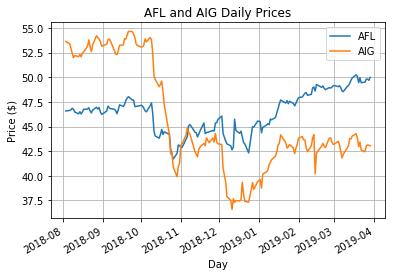

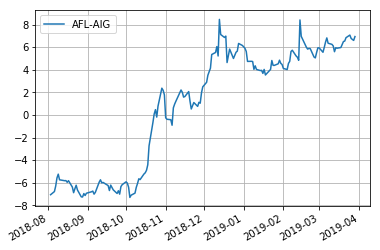

In [9]:
ts1 = df[ list(df)[0]]
ts2= df[list(df)[1]]



def plot_price_series(df, ts1, ts2):
    #months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, ts1, label=ts1.name)
    ax.plot(df.index, ts2, label=ts2.name)
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Day')
    plt.ylabel('Price ($)')
    plt.title('%s and %s Daily Prices' % (ts1.name, ts2.name))
    plt.legend()
    plt.show()
    
plot_price_series(df,ts1,ts2)


fig, ax = plt.subplots()
ax.plot(ts1.index, ts1-ts2,label=ts1.name+"-"+ts2.name) 
ax.grid(True)
fig.autofmt_xdate()
plt.legend()
plt.show()

In [8]:
# check NaN
#df.drop('BHF', axis=1, inplace=True)
#df.drop('BRK.B', axis=1, inplace=True)

df_2 = df.isnull().sum()

#print (type(df_2))

#print( df.isnull().sum())




df_1 = np.log(df) - np.log(df.shift(1))

df_1 = df_1.iloc[1:]

#print(df_1.isnull().sum())

df_1.iloc[0:20,0:10]

,AFL,AIG,AIZ,AJG,ALL,AMG,AMP,AON,AXP,BAC
Date,,,,,,,,,,
2018-04-04,0.012510,0.009078,0.013359,0.008073,0.014715,0.013630,0.006887,0.009969,0.009017,0.009753
2018-04-05,-0.012281,0.006068,0.006777,0.000438,0.006196,-0.010494,0.001851,0.000285,0.006603,0.014618
2018-04-06,-0.007580,-0.017569,-0.024927,-0.019776,-0.012744,-0.031081,-0.032445,-0.014154,-0.024610,-0.023020
2018-04-09,0.005060,-0.005613,0.002008,0.005055,-0.001252,-0.010025,0.000495,0.005844,0.002499,0.008067
2018-04-10,0.017961,0.004119,0.011194,0.013844,0.013893,0.009118,0.020374,0.008239,0.009290,0.020216
2018-04-11,-0.004290,-0.002994,-0.001544,-0.004691,-0.009518,-0.031463,-0.020445,-0.000857,-0.015168,-0.019212
2018-04-12,0.010356,0.002433,0.013269,0.007466,0.005701,0.014471,0.015164,0.011078,0.018925,0.024774
2018-04-13,-0.002018,0.001868,-0.003164,-0.001606,-0.004039,-0.023705,-0.013326,0.002962,-0.003434,-0.028124
2018-04-16,0.004702,0.012793,0.010760,0.012053,0.012069,0.012390,0.013744,0.012316,0.006108,0.004353


stock size  66
coin_test AIG and RJF  (-3.9459798012653224, 0.008561613453587729, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.962675565525513
OLS:  const   -16.848448
RJF       0.752761
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AIG-(1*0.7527607619739374)*RJF


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


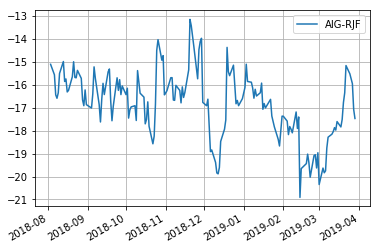

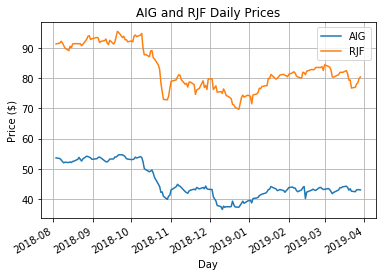

coin_test AIZ and AMP  (-4.647248789834233, 0.0006943756580133068, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9185656984573912
OLS:  const    43.736214
AMP       0.428706
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AIZ-(1*0.42870629907529534)*AMP


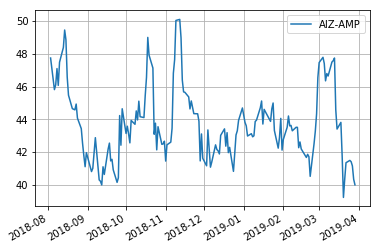

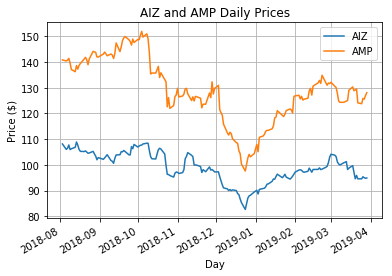

coin_test AIZ and C  (-4.034645541491177, 0.00640521877600611, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9230540668630368
OLS:  const    40.084685
C         0.911141
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AIZ-(1*0.9111407010243013)*C


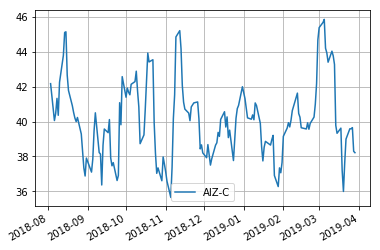

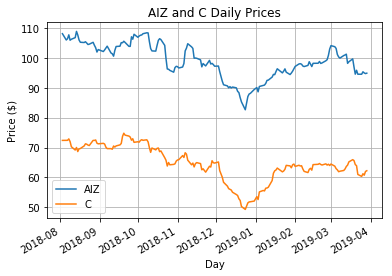

coin_test AIZ and CFG  (-3.9929396481270696, 0.007349511866385676, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.8817445071490946
OLS:  const    44.344304
CFG       1.512184
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AIZ-(1*1.5121837197862469)*CFG


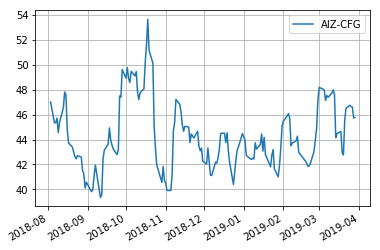

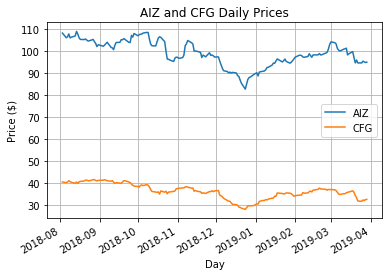

coin_test AIZ and DFS  (-4.539322019896987, 0.0010545757081705364, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9003361971413201
OLS:  const    36.028535
DFS       0.890798
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AIZ-(1*0.8907976476192481)*DFS


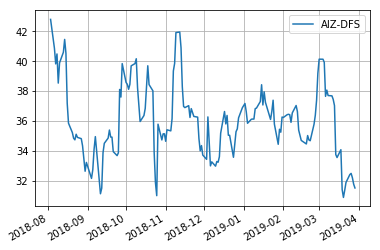

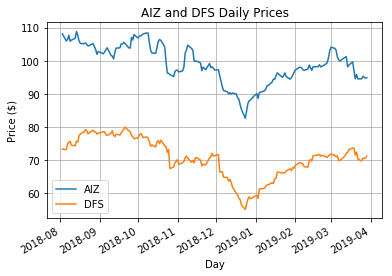

coin_test AIZ and GS  (-4.378277301508335, 0.0019273862856526765, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.8639078273253138
OLS:  const    52.882823
GS        0.224347
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AIZ-(1*0.22434679444064937)*GS


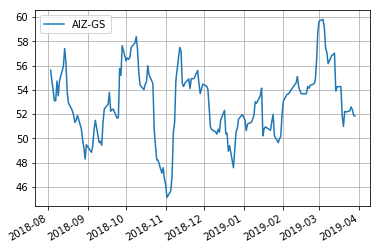

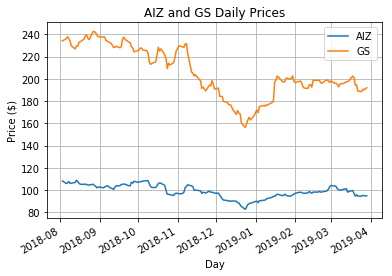

coin_test AIZ and LNC  (-4.2830070434515966, 0.0027210734065469086, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9414602680298537
OLS:  const    32.206120
LNC       1.086962
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AIZ-(1*1.0869617943781562)*LNC


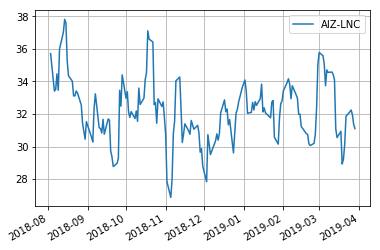

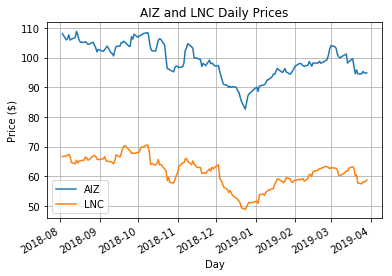

coin_test AIZ and PRU  (-4.893930835212711, 0.000256731865043698, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9325820222676052
OLS:  const    16.356350
PRU       0.881344
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AIZ-(1*0.8813438527984172)*PRU


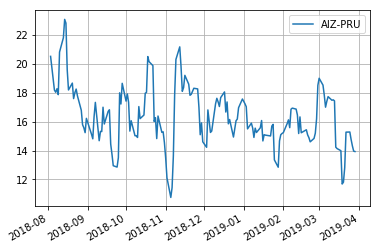

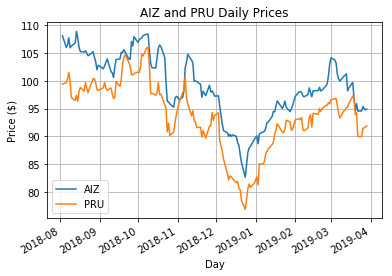

coin_test AJG and AON  (-4.154888069593226, 0.0042652786195604905, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9574760658558865
OLS:  const    28.958017
AON       0.296059
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=AJG-(1*0.29605907371176576)*AON


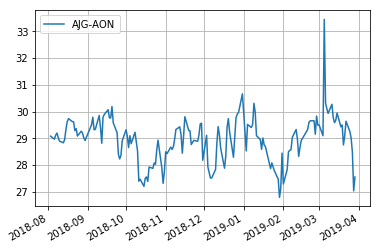

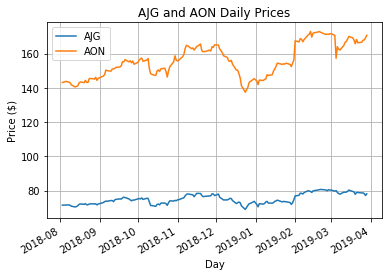

coin_test BBT and BLK  (-3.911029760040498, 0.009577205415471786, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.7110563514244574
OLS:  const    26.033366
BLK       0.053678
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.053677988303095614)*BLK


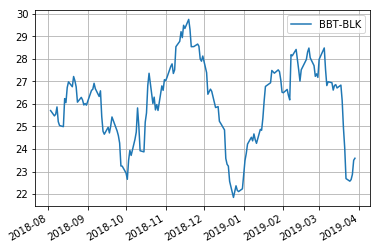

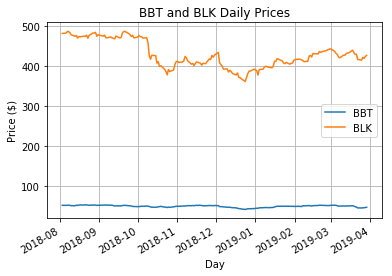

coin_test BBT and CMA  (-4.387483830002066, 0.0018633316780039685, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.8278176093212507
OLS:  const    29.930593
CMA       0.228670
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.22867013874566636)*CMA


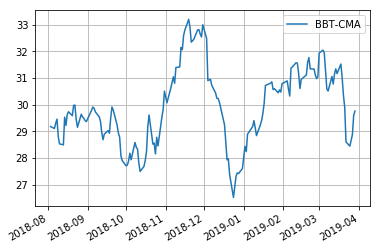

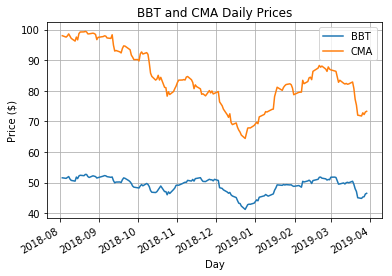

coin_test BBT and CME  (-4.198647515917775, 0.0036650810627428844, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  -0.20962917881574542
OLS:  const    60.870347
CME      -0.066008
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*-0.06600795787167195)*CME


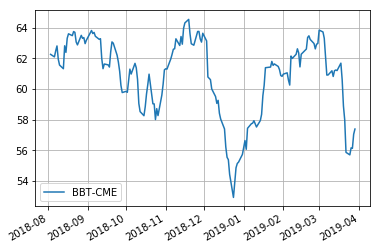

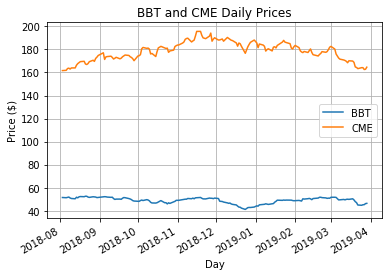

coin_test BBT and COF  (-4.2709472262313, 0.002840669277250998, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.6566962487273579
OLS:  const    30.449542
COF       0.213343
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.21334292296111812)*COF


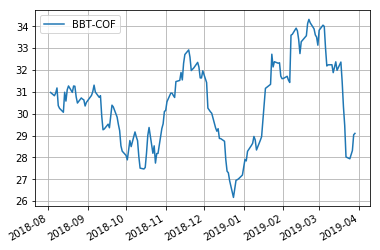

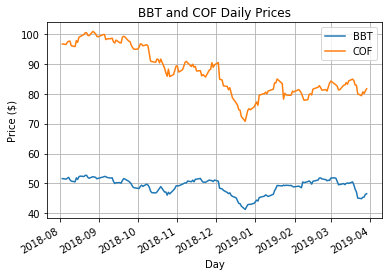

coin_test BBT and GS  (-4.4479900288548775, 0.0014891243804847614, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.6822102966252964
OLS:  const    32.979328
GS        0.078194
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.07819375655622425)*GS


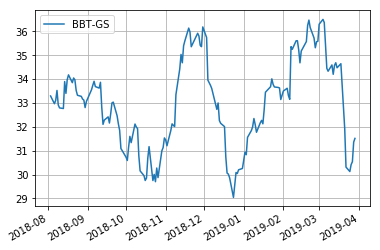

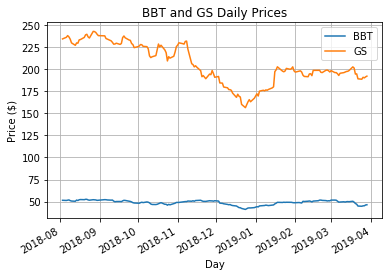

coin_test BBT and MS  (-4.06805814242631, 0.005729495965615733, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.6603671099287133
OLS:  const    25.179627
MS        0.540625
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.5406252300948957)*MS


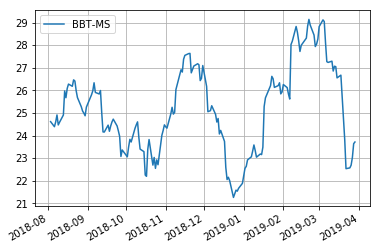

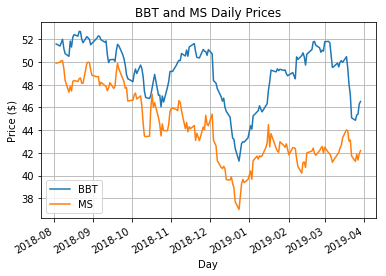

coin_test BBT and PFG  (-4.28410103931695, 0.0027104572681070534, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.6194394361891481
OLS:  const    31.976003
PFG       0.335546
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.3355461210303773)*PFG


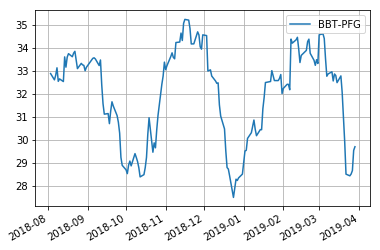

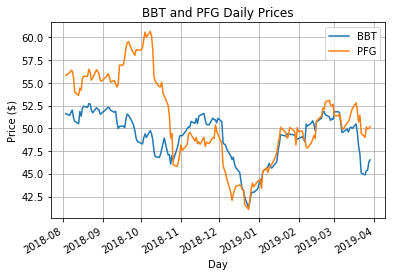

coin_test BBT and RJF  (-4.638426562449815, 0.0007187963579829335, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.6348692360156672
OLS:  const    29.719052
RJF       0.233443
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.23344341006610814)*RJF


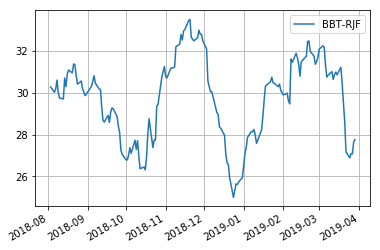

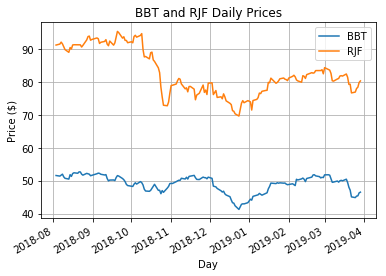

coin_test BBT and SIVB  (-4.520075681830749, 0.001134861623775309, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.6667778114894759
OLS:  const    39.342942
SIVB      0.037710
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.037710103101271784)*SIVB


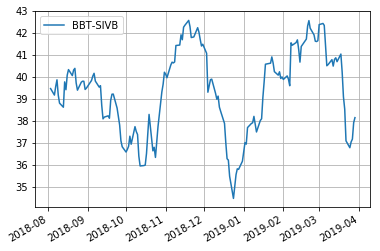

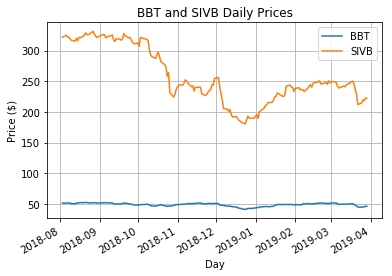

coin_test BBT and STT  (-4.249412992663581, 0.003066336382891006, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.6588978749620236
OLS:  const    34.551424
STT       0.195799
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.1957986891034982)*STT


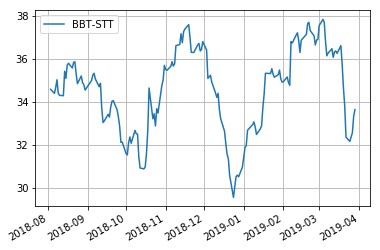

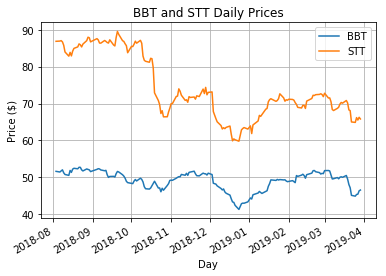

coin_test BBT and SYF  (-3.9275865785785657, 0.009083360171586096, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.592063759507234
OLS:  const    34.506551
SYF       0.498998
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.4989978485172591)*SYF


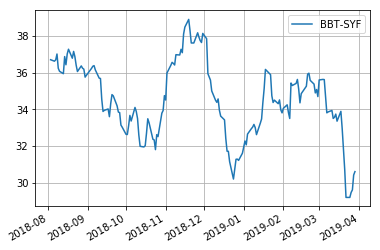

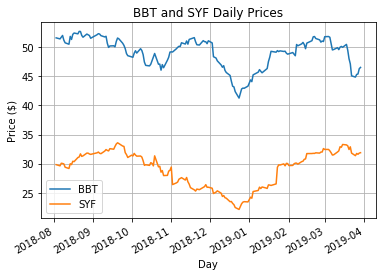

coin_test BBT and TROW  (-4.4791810344748555, 0.0013247776603978075, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.6315227202756298
OLS:  const    30.446254
TROW      0.184913
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BBT-(1*0.18491287460273673)*TROW


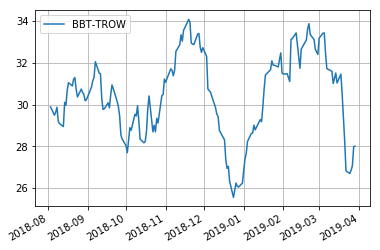

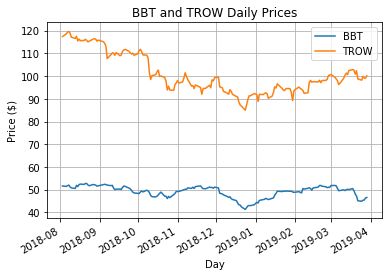

coin_test BHF and UNM  (-4.621990965429794, 0.0007664581673258809, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9356591916081687
OLS:  const   -9.373449
UNM      1.373902
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=BHF-(1*1.3739022920383845)*UNM


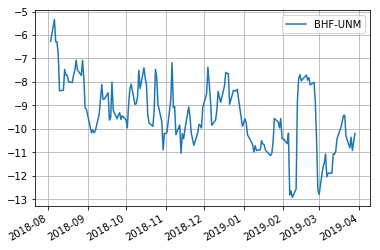

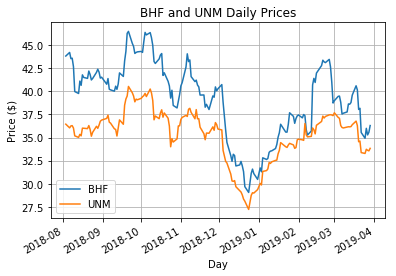

coin_test CB and MSCI  (-4.712116818223444, 0.0005373619175290297, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.7928654729352489
OLS:  const    96.774831
MSCI      0.213962
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=CB-(1*0.21396199308357133)*MSCI


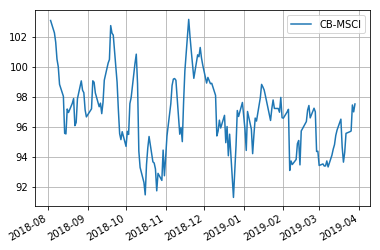

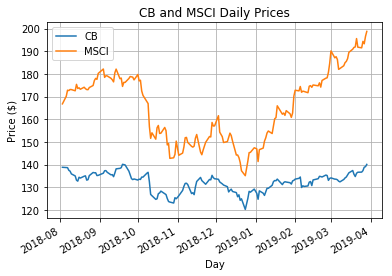

coin_test CB and SPGI  (-4.433113463537694, 0.0015740234900118116, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.808181154781659
OLS:  const    85.739796
SPGI      0.243908
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=CB-(1*0.24390840860403107)*SPGI


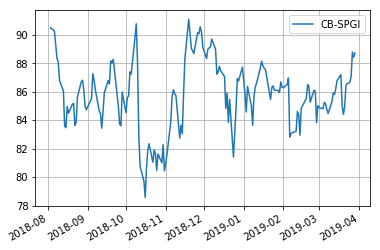

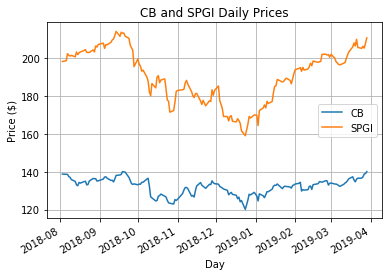

coin_test CME and MSCI  (-4.11961543064049, 0.0048130403512566524, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  -0.7308492173052802
OLS:  const    241.942122
MSCI      -0.383751
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=CME-(1*-0.38375114571580404)*MSCI


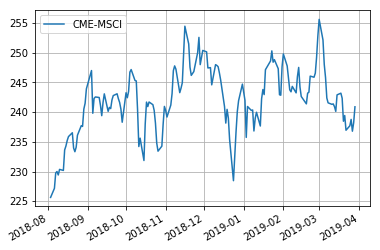

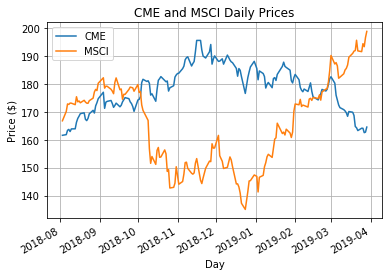

coin_test COF and MS  (-4.186393915776998, 0.0038248297568553875, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9665783740270051
OLS:  const   -20.350385
MS        2.435759
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=COF-(1*2.43575859377973)*MS


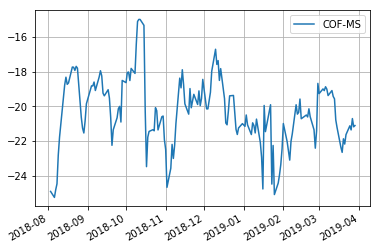

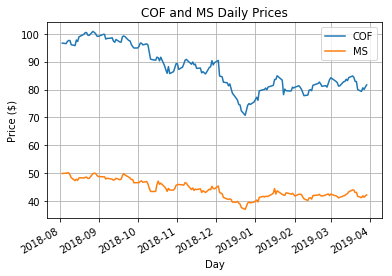

coin_test FITB and STI  (-4.2907823997030565, 0.002646445851157054, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9556654553049688
OLS:  const    10.667325
STI       0.260618
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=FITB-(1*0.2606177803666252)*STI


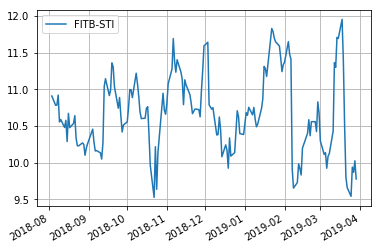

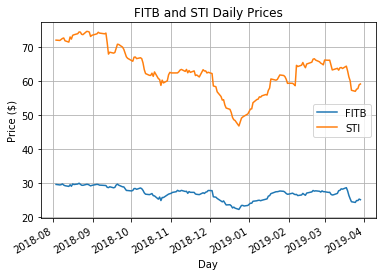

coin_test HBAN and JEF  (-4.084698183959526, 0.005417710016229166, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9598554460423636
OLS:  const    0.543606
JEF      0.654379
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=HBAN-(1*0.6543786088747601)*JEF


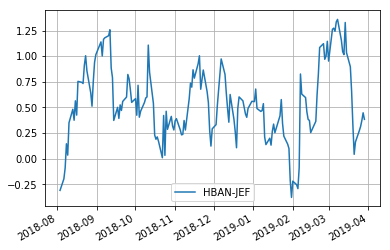

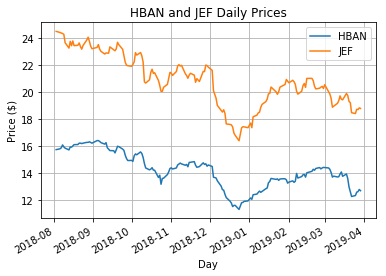

coin_test IVZ and MS  (-3.9880756479123765, 0.007467449855058584, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9687342778656042
OLS:  const   -15.428549
MS        0.813305
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=IVZ-(1*0.8133046430399795)*MS


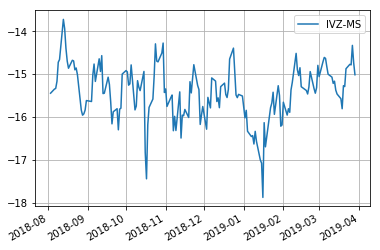

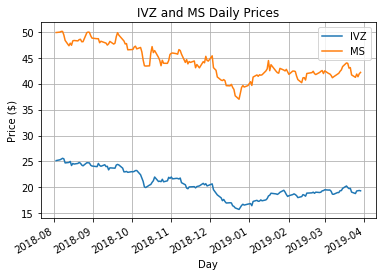

coin_test IVZ and NTRS  (-4.202475135373692, 0.0036164489631037248, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9494011562436623
OLS:  const   -8.054852
NTRS     0.299350
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=IVZ-(1*0.29935012578025)*NTRS


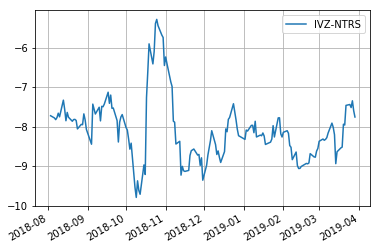

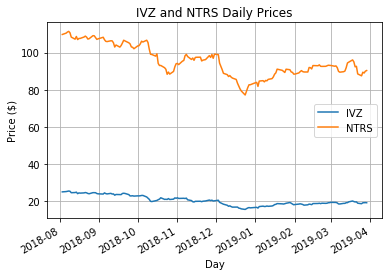

coin_test JEF and KEY  (-4.215219186309908, 0.003458762332634583, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9635602732977213
OLS:  const    4.847867
KEY      0.887662
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=JEF-(1*0.8876615844153315)*KEY


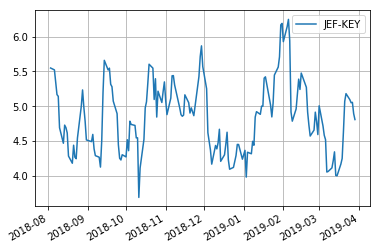

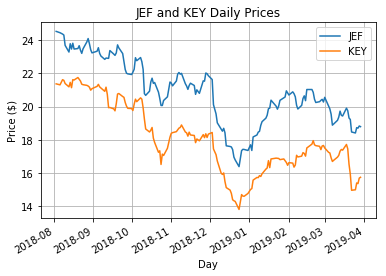

coin_test JPM and KEY  (-4.359905099719537, 0.0020613571756668806, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9687488338132675
OLS:  const    56.124938
KEY       2.833980
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=JPM-(1*2.8339798211391694)*KEY


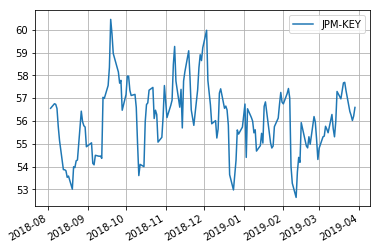

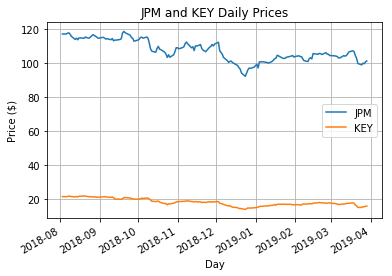

coin_test L and PNC  (-3.919022437655939, 0.009335880686777098, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9026634504838724
OLS:  const    23.858290
PNC       0.185411
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=L-(1*0.18541145194084016)*PNC


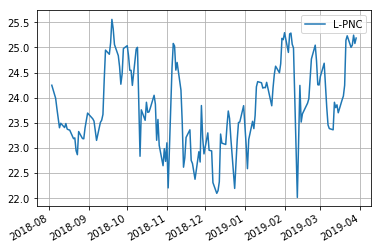

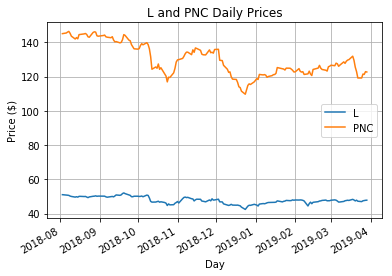

coin_test RE and RF  (-4.36904088456844, 0.0019936956999729305, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.3878011067422227
OLS:  const    200.776566
RF         1.072860
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*1.072860014958136)*RF


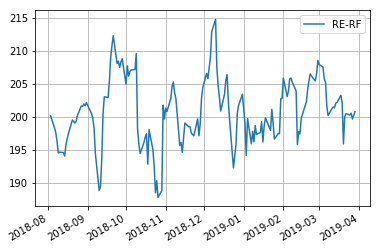

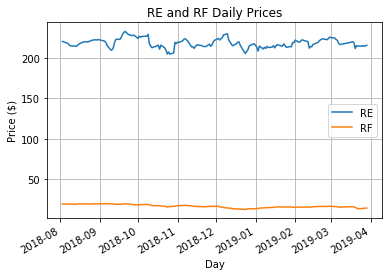

coin_test RE and RJF  (-4.452086059896848, 0.001466508537632312, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.4786235874247394
OLS:  const    187.333418
RJF        0.375908
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.3759080799534824)*RJF


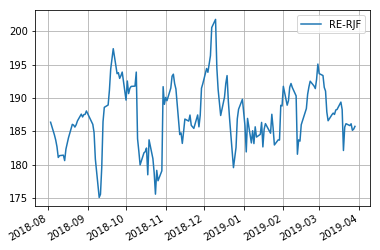

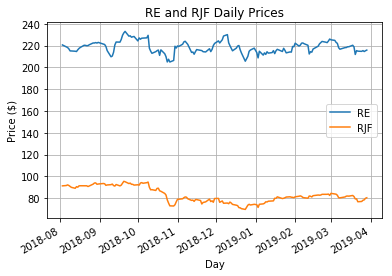

coin_test RE and SCHW  (-4.368485981904665, 0.001997745981455461, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.4231096319693576
OLS:  const    187.306921
SCHW       0.671280
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.6712802569094444)*SCHW


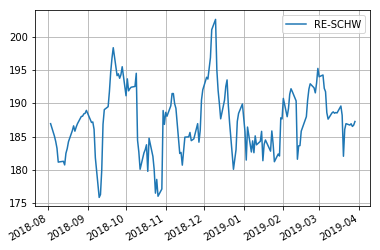

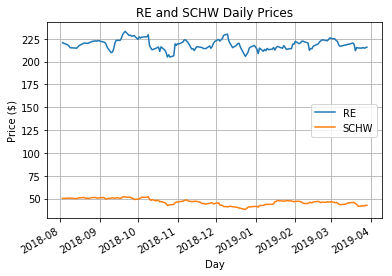

coin_test RE and SIVB  (-4.494169637656729, 0.001251968213423843, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.371532515829432
OLS:  const    206.933082
SIVB       0.044881
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.04488111485204242)*SIVB


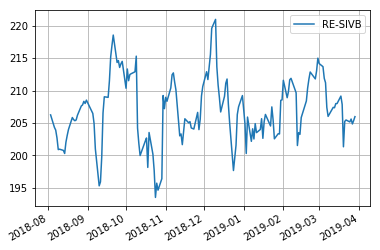

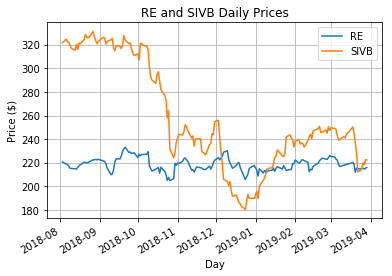

coin_test RE and SPGI  (-4.326329736430536, 0.002328714778538688, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.3851612772213427
OLS:  const    189.505301
SPGI       0.152118
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.15211786902345842)*SPGI


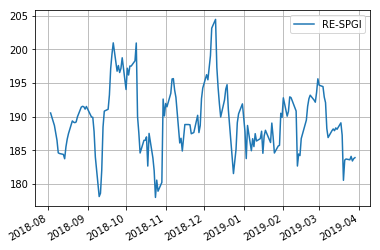

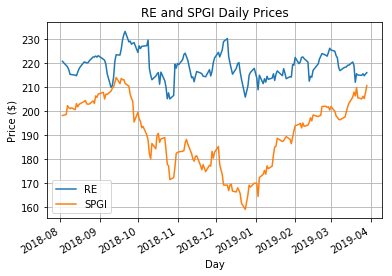

coin_test RE and STI  (-4.461449446352584, 0.001416005326803538, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.36794255010625715
OLS:  const    199.465873
STI        0.301406
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.3014063697584092)*STI


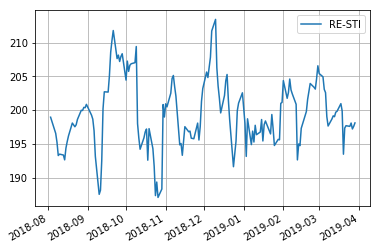

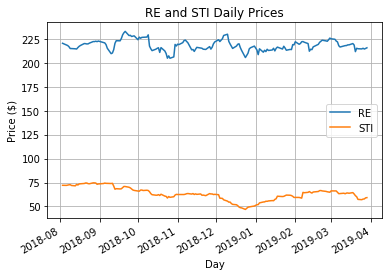

coin_test RE and STT  (-4.477028209131252, 0.0013355539374052513, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.41744331012096075
OLS:  const    198.856726
STT        0.264959
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.2649594452688435)*STT


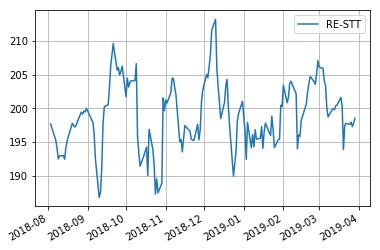

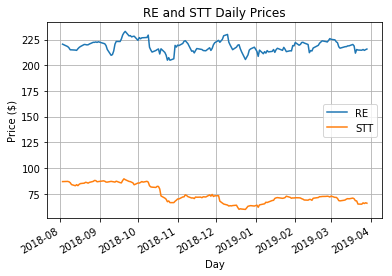

coin_test RE and SYF  (-4.366725794508109, 0.0020106442541239465, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.36441487643156995
OLS:  const    199.358906
SYF        0.656019
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.656019153955155)*SYF


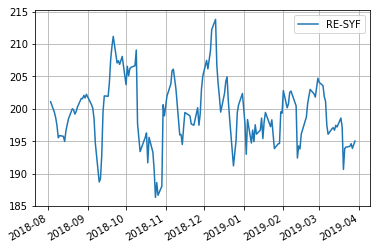

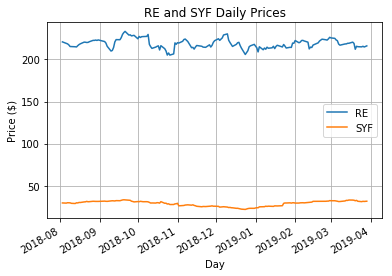

coin_test RE and TMK  (-4.2300991946608875, 0.0032826448878299913, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.38422647620486744
OLS:  const    173.953738
TMK        0.533144
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.5331439877319168)*TMK


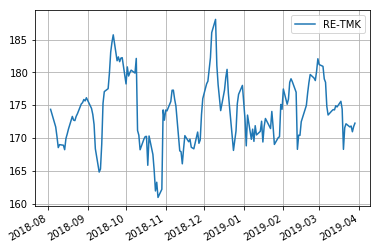

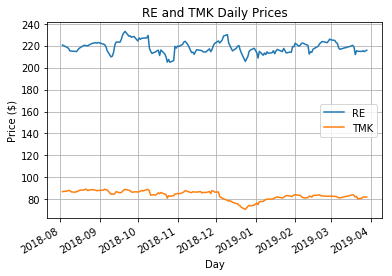

coin_test RE and TROW  (-4.381906279125614, 0.0019018975906530573, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.3823540845140141
OLS:  const    194.421607
TROW       0.239130
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.23913003731381405)*TROW


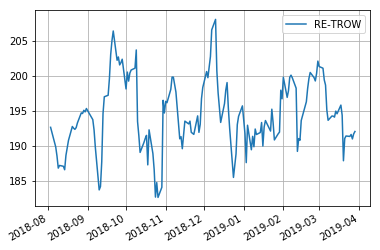

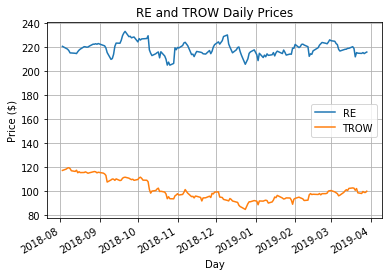

coin_test RE and TRV  (-3.9526524781272454, 0.008379091855145572, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.49643342889099906
OLS:  const    149.135361
TRV        0.544522
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.5445224073251758)*TRV


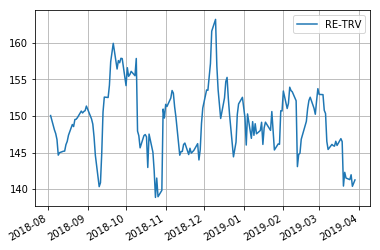

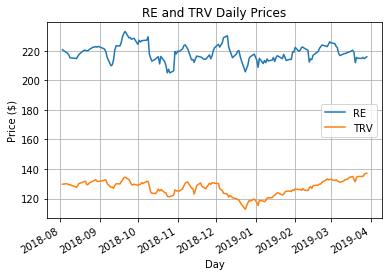

coin_test RE and UNM  (-4.383487739054801, 0.0018908880677670993, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.4861122296286675
OLS:  const    184.724081
UNM        0.956398
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.9563977535439321)*UNM


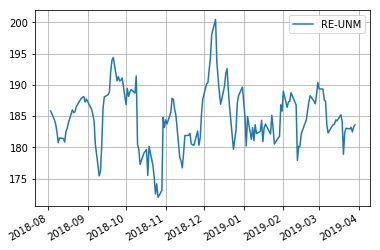

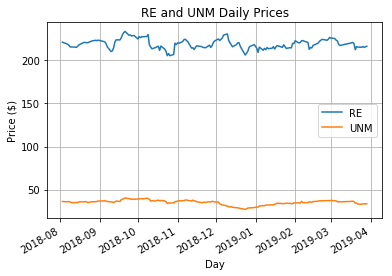

coin_test RE and USB  (-4.399046232335567, 0.001785683951749026, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.4452484585763288
OLS:  const    169.364180
USB        0.954102
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.9541023235303908)*USB


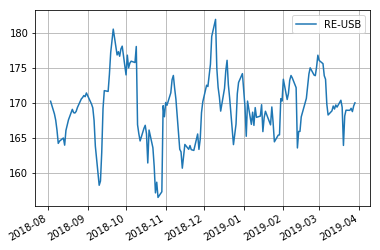

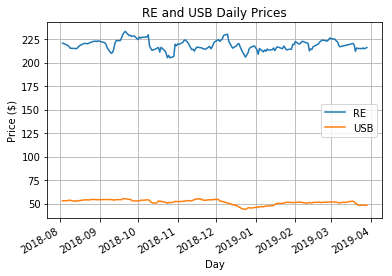

coin_test RE and WFC  (-4.220058071854545, 0.0034005604301096714, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.2377398904112002
OLS:  const    200.982279
WFC        0.338496
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.33849567897185556)*WFC


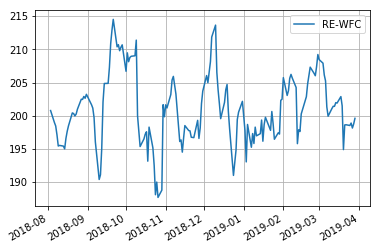

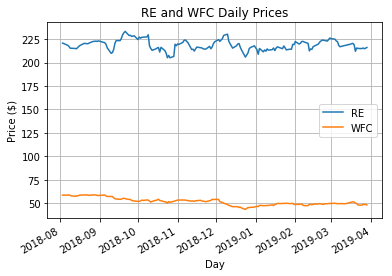

coin_test RE and WLTW  (-4.131905091721724, 0.004615301702765031, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.05024704754519603
OLS:  const    214.751712
WLTW       0.024510
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.024510495544177224)*WLTW


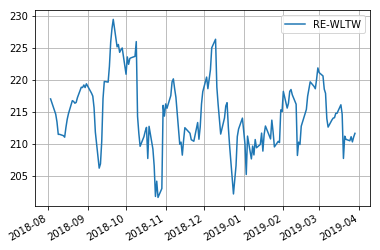

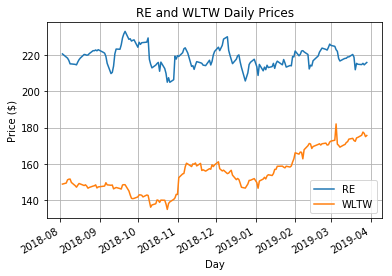

coin_test RE and ZION  (-4.4243970564874875, 0.0016258372689337147, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.42564029594786784
OLS:  const    188.497307
ZION       0.619214
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=RE-(1*0.6192140008022442)*ZION


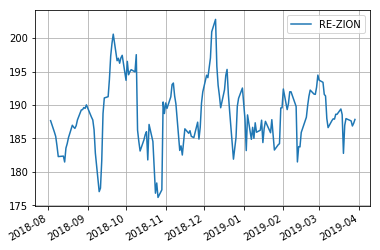

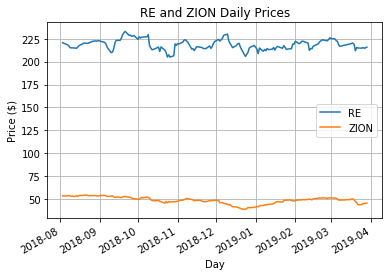

coin_test STI and ZION  (-4.121068132727522, 0.004789270705510773, array([-3.96489145, -3.37387208, -3.07057201]))
correlation  0.9738818358542191
OLS:  const   -20.621292
ZION      1.729545
dtype: float64
check chart: https://www.tradingview.com/chart/?symbol=STI-(1*1.7295450731028015)*ZION


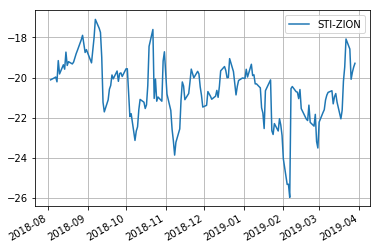

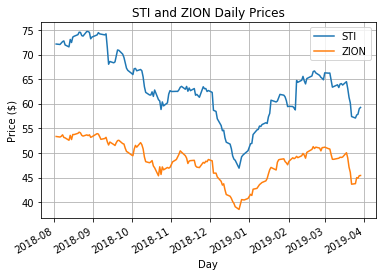

Signal count  50


In [10]:
import statsmodels.tsa.stattools as ts 
import statsmodels.api as sm
#result = ts.coint(ts1, ts2)

#print ("coin test - sig lvl 5%", result)


def coint_finder(all_stck_df):
    stck_size = len(all_stck_df.columns)
    print("stock size ",stck_size)
    pairs=[[]]
    signal_count =0
    for i in range (0,stck_size):
        for j in range (i+1, stck_size):
            ts1 = all_stck_df[ list(all_stck_df)[i]]
            ts2 = all_stck_df[ list(all_stck_df)[j]]
            
            coin_test = ts.coint(ts1, ts2)
            #print("coin_test %s and %s "%(ts1.name, ts2.name),coin_test)
            if ( coin_test[1]< 0.01 ): #pvalue,  If the pvalue is small, below a critical size, then we can reject the hypothesis that there is no cointegrating relationship.
                
                
                print("coin_test %s and %s "%(ts1.name, ts2.name),coin_test)
                
            
                
                
                x=ts2
                y=ts1
                x=sm.add_constant(x)
                res = sm.OLS(y,x).fit()
                
                corr = np.corrcoef(ts1, ts2)
                print ("correlation ", corr[0][1])
                
                print("OLS: ", res.params)
                
                base_url= "https://www.tradingview.com/chart/?symbol="
                print("check chart: https://www.tradingview.com/chart/?symbol=%s-(1*%s)*%s"%(ts1.name,res.params[1],ts2.name))
                
                fig, ax = plt.subplots()
                ax.plot(ts1.index,ts1-res.params[1]*ts2,label=ts1.name+"-"+ts2.name) 
                ax.grid(True)
                fig.autofmt_xdate()
                plt.legend()
                plt.show()
                               
                plot_price_series(all_stck_df,ts1,ts2) 
                
                
                
                pairs.append([ts1.name, ts2.name])
                print("===============")
                
                signal_count+=1
            else:
                pass
    print("Signal count ", signal_count)

df_1 = np.log(df) - np.log(df.shift(1))

df_1 = df_1.iloc[1:]

#print(df_1)
coint_finder(df.iloc[:,:]) # use raw price to do cointergation and regression